# Balanceamento de classes

Vamos abordar classes desbalanceadas, usaremos algumas tecnicas e por último, no SMOTE veremos a diferença de balancear ou não a validação.<br>
OBS: Como nosso objetivo neste tutorial é tratar o balanceamento de dados não trataremos a tabela com a devida atenção.

## Bibliotecas

In [231]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [232]:
#!pip install imblearn

In [233]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns

## Coleta de dados
Coluna default (alvo), fraudes.

In [234]:
df = pd.read_csv("bank-full.csv", sep=',' )
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


## Tratamento de dados
Transformando em variáveis dummies

In [235]:
cols = ['education', 'default',  'housing',
       'loan', 'contact', 'month', 'poutcome', 'Target']
# Aplicando LabelEncoder para coluna facebook (0 ou 1)
for col in cols:
    encoder = LabelEncoder().fit(df[col])
    df[col] = encoder.transform(df[col])
    
# Aplicando One-hot encoder para as demais colunas (usando get_dummies)   
col_dummies = ['job', 'marital']


df = pd.get_dummies(df, columns = col_dummies)
df.head(4)   

,age,education,default,balance,housing,loan,contact,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,2,0,2143,1,0,2,5,8,261,...,0,0,0,0,0,0,0,0,1,0
1,44,1,0,29,1,0,2,5,8,151,...,0,0,0,0,1,0,0,0,0,1
2,33,1,0,2,1,1,2,5,8,76,...,0,0,0,0,0,0,0,0,1,0
3,47,3,0,1506,1,0,2,5,8,92,...,0,0,0,0,0,0,0,0,1,0


### Treinando o modelo (sem balancear)

In [236]:
# Verificando a discrepancia dos dados
# Notamos que está completamente desbalanceados
df.default.value_counts()

0    44396
1      815
Name: default, dtype: int64

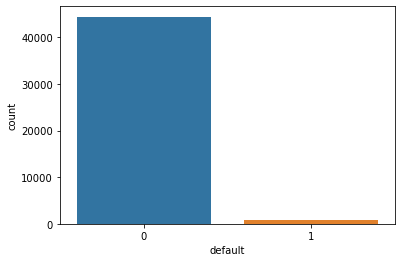

In [237]:
import seaborn as sns
ax = sns.countplot(x='default', data=df)

### Algoritmo classificador

In [238]:
lr = LogisticRegression(solver='lbfgs', max_iter=100)


### Separar dados e suas classes

In [239]:
# Separa a variavel alvo da tabela
X = df.drop('default', axis=1)
y = df.default

### Separar dados de treino e teste
    * Percentual padrão: 70% treino 30% teste
    * random_state: Aleatóriedade
    * stratify: Proporção iguais de classes para treino e teste

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , stratify=y)

### Treinando o algoritmo

In [241]:
# passando pro classificador os dados de treino
lr.fit(X_train, y_train)

C:\Users\devda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Coloca as classificações na var y_pred

In [242]:
y_pred = lr.predict(X_test)

### Checando a acurácia do modelo

In [243]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracity de {acc:,.2%}')

Accuracity de 98.15%


### Relatório de classificação
Observe o Recall

In [244]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11099
           1       0.22      0.01      0.02       204

    accuracy                           0.98     11303
   macro avg       0.60      0.50      0.50     11303
weighted avg       0.97      0.98      0.97     11303



### Matriz de confusão

In [245]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito      0  1    All
Real                    
0        11092  7  11099
1          202  2    204
All      11294  9  11303


# Balanceamento de classes

## Aplicando NearMiss
    * Método de Undersampling
    * Iguala as quantidades de amostras entre as classes reduzindo a classe majoritária (pode haver muita perda de dados).

In [246]:
from imblearn.under_sampling import NearMiss

### Instanciando NR

In [247]:
# Aqui podemos passar os parametros para o nr
nr = NearMiss()

### Aplicando NR

In [248]:
# descobre as classes majoritárias e iguala as minoritarias
X, y = nr.fit_resample(X, y)
X.shape, y.shape

((1630, 29), (1630,))

### Checando as novas amostras
    * Reduziu as classes majoritarias a nível de minoritaria ficando com apenas 815 amostras cada, perda extremamente considarada, mas vamos continuar...

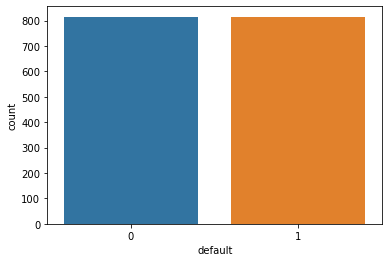

In [249]:
ax = sns.countplot(x=y)

### Treinando modelo (classes balanceadas)

In [250]:
# Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1 , stratify=y)
# Treinando o modelo com classificador LR
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
# Testando o modelo
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracity de {acc:,.2%}')

Accuracity de 74.51%


C:\Users\devda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Recall

In [251]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76       204
           1       0.79      0.67      0.72       204

    accuracy                           0.75       408
   macro avg       0.75      0.75      0.74       408
weighted avg       0.75      0.75      0.74       408



### Matriz de confusão

In [252]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito    0    1  All
Real                  
0        168   36  204
1         68  136  204
All      236  172  408


NOTAS: Apesar da acuracia cair, nosso modelo conseguiu prever com melhor eficiência ambas as classes.

# Aplicando SMOTE
Aqui vamos criar uma função que separa o validor antes de balancear as classes, assmi temos um validador fiel a realidade.


In [253]:
from imblearn.over_sampling import SMOTE

### Verificando o desbalanceamento da coluna Target (alvo)

In [254]:
# desbalanceamento em quantidade
df.default.value_counts()

0    44396
1      815
Name: default, dtype: int64

In [255]:
# desbalanceamento em porcentagem
100* df.default.value_counts(normalize=True)

0    98.197341
1     1.802659
Name: default, dtype: float64

### Separar dados e suas classes

In [256]:
# Separa a variavel alvo da tabela
X = df.drop('default', axis=1)
y = df[['default']]

X.shape, y.shape

((45211, 29), (45211, 1))

### Separando dados de treino e teste
- Aqui vem a sacada, separar primeiro os dados, realizar o CV, para somente depooooois realizar o balanceamento nos dados de treino.

In [257]:
X_treino, X_test, y_treino, y_test = train_test_split(X, y, stratify=y)

X_treino.shape, X_test.shape, y_treino.shape, y_test.shape


((33908, 29), (11303, 29), (33908, 1), (11303, 1))

# SMOTE  (S/ validação balanceada)
* Forma correta

#### Validação cruzada
- Vamos criar nossa validação cruzada na unha, pra garantir que nossa validação não esteja contaminada com dados balanceados, coisa que o cross validation não faz sem nossa "ajudinha"

In [258]:
# função de validação cruzada "artesanal"
from sklearn.model_selection import KFold

# Oversamping = False nossa validação não será balanceada
def validacao_cruzada(modelo, X, y, oversampling=False):
    
    kfold = KFold(n_splits=5) # separa a tabela em 5 partes
    acuracias_split = []
    
    # iterando sobres os splits
    for idx, (idx_treino, idx_validacao) in enumerate(kfold.split(X)):
        X_split_treino = X.iloc[idx_treino, :]
        y_split_treino = y.iloc[idx_treino, :]
        
        # oversampling = TRUE: balanceamento SOMENTE no split de treino
        if oversampling:
            sm = SMOTE(random_state=40)
            X_split_treino, y_split_treino, = sm.fit_resample(X_split_treino, y_split_treino)
        
        # com os dados balanceados so no treino, vamos treinar nosso modelo
        modelo.fit(X_split_treino, y_split_treino.values.flatten())
        
        X_split_validacao = X.iloc[idx_validacao, :]
        y_split_validacao = y.iloc[idx_validacao, :]
        
        # validacao SEM OVERSAMPLIG, que é o certo!
        # amostras desbalanceadas igual mundo real
        predições_validacao = modelo.predict(X_split_validacao)
        
        acuracia_split = accuracy_score(y_split_validacao, predições_validacao)
        
        acuracias_split.append(acuracia_split)
        
        acuracia_split = acuracia_split * 100

        print(f'Acurácia do split {idx + 1}: {acuracia_split:.2f}%')
        
    return acuracias_split
        

## Criando nosso modelo

In [259]:
from sklearn.ensemble import HistGradientBoostingClassifier
from statistics import mean

# Criando o modelo
modelo_hgb = HistGradientBoostingClassifier()

In [260]:
media_acuracia_sem_smote = mean(validacao_cruzada(modelo_hgb, X_treino, y_treino, oversampling=False)) * 100

Acurácia do split 1: 98.23%
Acurácia do split 2: 97.86%
Acurácia do split 3: 98.08%
Acurácia do split 4: 98.32%
Acurácia do split 5: 98.10%


In [261]:
media_acuracia_com_smote = mean(validacao_cruzada(modelo_hgb, X_treino, y_treino, oversampling=True)) * 100

Acurácia do split 1: 97.70%
Acurácia do split 2: 97.61%
Acurácia do split 3: 97.54%
Acurácia do split 4: 97.88%
Acurácia do split 5: 97.42%


In [262]:
f'Sem smote: {media_acuracia_sem_smote:.2f}%, com_smote: {media_acuracia_com_smote:.2f}%'

'Sem smote: 98.12%, com_smote: 97.63%'

# SMOTE  (C/ validação balanceada)
* Forma errada

In [263]:
from sklearn.model_selection import cross_val_score

# ERRADO! Não se deve balancear as classes antes do split
sm = SMOTE(random_state=42)
X_treino, y_treino = sm.fit_resample(X_treino, y_treino)

# Os splits criados no cross_val_score estão com a validação BALANCEADA
# E isso é distorcer a realidade!
media = mean(cross_val_score(modelo_hgb, X_treino, y_treino.values.flatten())) * 100
print(f'Média com o balanceamento da validação: {media:.2f}%')

Média com o balanceamento da validação: 98.34%


# Conclusão
- Com a validação balanceada tivemos uma acurácia levemente melhor, porém o modelo não esta preparado para omundo real, sem balanceamento na validação a acurácia pode diminuir, porém na vida real o modelo será mais acertivo.
- Então concluimos que nem sempre uma acurácia mais alta é garantia de acertividade com dados externos.